In [21]:
%pylab inline
import pylab as plt
import numpy as np



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


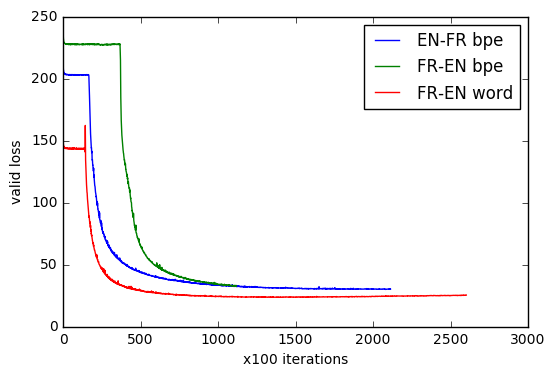

In [62]:
data = np.load('.model/baseline_fren.bpe.npz')
errors = data['history_errs']
plt.plot(errors, label='EN-FR bpe')
data = np.load('.model/baseline_enfr.bpe.npz')
errors = data['history_errs']
plt.plot(errors, label='FR-EN bpe')
data = np.load('.model/baseline_fren.npz')
errors = data['history_errs']
plt.plot(errors, label='FR-EN word')
plt.xlabel('x100 iterations')
plt.ylabel('valid loss')
#plt.ylim([100, 230])
#plt.xlim([0, 200])
plt.legend(loc='upper right')
plt.show()

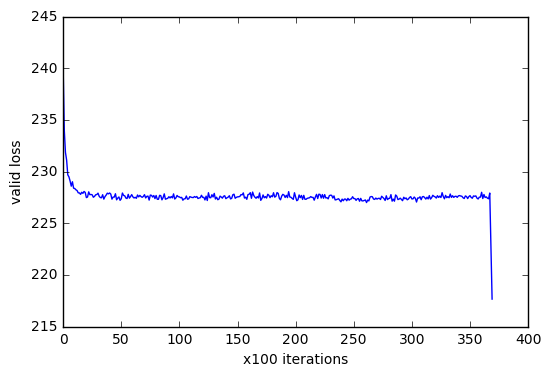

In [45]:
data = np.load('.model/baseline_enfr.bpe.npz')
errors = data['history_errs']
plt.plot(errors)
plt.xlabel('x100 iterations')
plt.ylabel('valid loss')
#plt.ylim([100, 230])
#plt.xlim([0, 200])
plt.show()